# Encontro 15 - Teste de permutação para diferença de médias

In [9]:
#Bibliotecas necessárias para a tarefa

%matplotlib inline

import pandas

import matplotlib.pyplot

from scipy import stats

import numpy
import math
import random

___
Uma fábrica realizou uma calibração em uma máquina na linha de produção. A equipe que realizou os ajustes afirmou que após a calibração, a máquina ainda manteve o mesmo tempo médio de produção. Para verificar se realmente o tempo médio permaneceu inalterado, foram realizadas duas medidas de tempo: uma antes e uma depois da calibração. 

Foram selecionadas 7 e 8 peças aleatorianente para as medidas antes e depois da calibração, repectivamente. Elas estão representadas abaixo pelas séries xA e xB, respectivamente.

Assuma que o tempo de produção de uma peça possui uma distribuição normal e que o desvio padrão realmente permaneceu inalterado, contudo desconhecido.

In [10]:
xA =   [ 47.66708824,  48.11337801,  47.83104582,  46.69416928,
        48.70934634,  45.61498917,  51.79239414]
xB =   [ 52.82692462,  49.60021673,  50.23705478,  49.65527133,
        49.78115306,  49.81176314,  53.04044198,  48.6253753 ]

a. Calcular a diferença entre os tempos médios depois e antes da calibração. Nomei essa diferença entre as médias amostrais originais de $d_{obs}$.

In [15]:
dobs = numpy.mean(xB) - numpy.mean(xA)
print("A diferença das médias observada de depois e antes: %f" % dobs)

A diferença das médias observada de depois e antes: 2.386931


___
Como os dois conjuntos representam uma pequena amostra da população, não é possível inferir que essa seja a real diferença entre as médias das duas variáveis aleatórias. Portanto é desejável aferir se realmente a diferença é zero, com um nível de significância de 5%.

b. Formule a hipótese nula e a hipótese alternativa em termos do problema e dos parâmetros:
\begin{equation*}
   H_0:\mbox{Calibração não alterou produção} \rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0
\end{equation*}   
\begin{equation*}
   H_a:\mbox{Calibração alterou produção} \rightarrow \mu_B\neq\mu_A \rightarrow \mu_B-\mu_A\neq0
\end{equation*}

___
Não há qualquer informação acerca do desvio padrão populacional. Ainda, a amostra contém poucos dados. Para concluir se a hipótese nula será ou não rejeitada, antes de realizar um teste convencional, o aluno decidiu realizar um **Teste de Permutação**.

Nesse teste, a ideia consiste em permutar os dados das duas amostras, ou seja, embraralhar os valores contidos em $x_A$ e $x_B$ e criar novas amostras. 

*Caso 1:* Caso ambas as amostras possuam a mesma unidade de medida e a ordem dos elementos nas amostras não seja importante, monta-se uma única lista com a união dos dados em $x_A$ e $x_B$, embaralha-se e separa-se novamente respeitando os tamanhos amostrais de cada amostra ($n_A$ e $n_B$). Note que os tamanhos amostrais não precisam ser necessariamente iguais.
Calcule a diferença entre as médias de $x_B$ e $x_A$ e guarde-a.

*Caso 2:* Caso as séries possuam unidades de medida diferentes ou o teste em questão exija uma certa ordem dos dados entre as amostras (por exemplo: teste de correlação), embaralha-se apenas uma das amostras. Logo, os novos pares de dados permutados ($x_A$,$x_B$) serão diferentes e, consequentemente, a diferença entre as médias de $x_B$ e $x_A$ também mudará.  Guarde esse valor.

A cada iteração é feita uma nova diferença entre as médias e armazenada em uma lista. Ao final, é possível montar um histograma que representa a distribuição dessas diferenças de médias entre as amostras permutadas.

Idealmente, é desejável a realização de todas as permutações possíveis, porém já os tamanhos das duas amostras $n_A=7$ e $n_B=8$, o número de combinações possíveis é 15!, ou mais de 1,3 trilhão de possibilidades, tornando a solução computacionalmente inviável.

c. Monte um programa para realizar o teste de permutação (considerando o Caso 1) para 100 mil iterações. Utilize o comando `random.shuffle()` para embaralhar a lista contendo a união dos dados em $x_A$ e $x_B$.

In [13]:
#Permutation test

nA = len(xA)
nB = len(xB)

#juntar as duas listas
xAB = xA + xB

#número de permutações, o ideal seria (m+n)! mas seria inviável.
t = 100000

perm = []
for i in range(0,t):
    #Embaralha o xy
    random.shuffle(xAB)
    #calcula a dif de medias entre o x e o y embaralhado e separado
    perm.append(numpy.mean(xAB[nB:]) - numpy.mean(xAB[0:nB]))


d. Exibir o histograma das diferenças entre as médias permutadas.

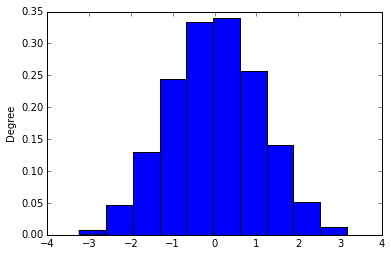

In [14]:
#Transforma a lista em série do pandas
perm = pandas.Series(perm)

#plota o histograma
pandas.DataFrame.plot(kind='hist', data=perm, normed=True, legend=False)

e. Calcule o valor-p do *teste de permutação*. Como o teste é bicaudal de acordo com a hipótese alterativa ($H_a:\mu_B-\mu_A\neq0$), se $d_{obs}>0$, conte quantas diferenças entre as médias permutadas foram **maiores** do que a diferença observada no item a, ou seja, $d_{obs}$; se $d_{obs}<0$, conte quantas diferenças entre as médias permutadas foram **menores** do que a diferença observada no item a, ou seja, $d_{obs}$. Divida essa contagem pelo total de iterações (100 mil) e multiple o resultado por 2. Faça uma conclusão.

In [16]:
#Permutação:
pvalue_perm = 2*(perm[perm > dobs]).count()/perm.count()

print("P-value através do teste de permutação: %f" % pvalue_perm)

P-value através do teste de permutação: 0.022060
